In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/drive/MyDrive/Shimla Final week wise.csv')
df.columns
train_dates=df['Week']

Index(['Week', 'Season', 'Air Travel', 'Hotel and Acc', 'Rail Travel',
       'Shopping', 'Covid 19', 'Travel Guides & Travelogues',
       'Car Rental & Taxi Services', 'Tourist Destinations', 'Image Search',
       'W1', 'W2', 'W3', 'Weekwise Tourists'],
      dtype='object')

trainX shape == (664, 14, 14).
trainY shape == (664, 1).
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 14, 64)            20224     
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 32673 (127.63 KB)
Trainable params: 32673 (127.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
50/50 [==============================] - 6s 22ms/step - loss: 0.8243 - val_loss: 

,Week,Weekwise Tourists
0,2022-11-09,55769.324219
1,2022-11-10,55340.273438
2,2022-11-14,55642.015625
3,2022-11-15,56517.257812
4,2022-11-16,58102.035156
...,...,...
195,2023-08-22,66570.937500
196,2023-08-23,68841.796875
197,2023-08-24,70425.398438
198,2023-08-25,72840.953125


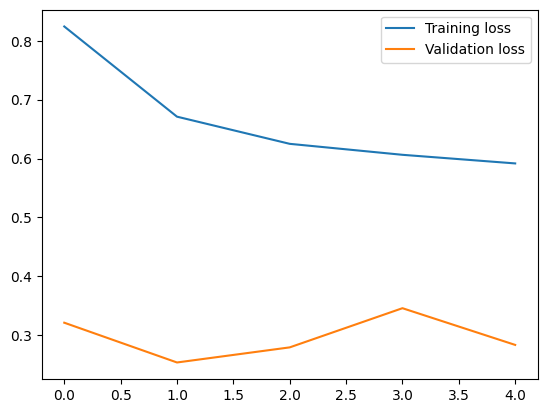

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from keras.models import load_model
from sklearn.metrics import accuracy_score


from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

#Variables for training
cols = list(df)[1:15]
df_for_training = df[cols].astype(float)
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.
trainX = []
trainY = []
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 4])
trainX, trainY = np.array(trainX), np.array(trainY)
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam', loss='mse')
model.summary()
# fit the model
history = model.fit(trainX, trainY, epochs=5, batch_size= 12, validation_split=0.1, verbose=1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
n_past = 16
n_days_for_prediction=200
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:])
#shape = (n, 1) where n is the n_days_for_prediction
prediction_copies = np.repeat(prediction,new_df.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,13]
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
df_forecast = pd.DataFrame({'Week':np.array(forecast_dates), 'Weekwise Tourists':y_pred_future})
df_forecast
